## Add necessary imports

In [58]:
import ipywidgets as widgets
from IPython.display import display 
from ipywidgets import interact 
import pandas as pd
from functions import *  
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

# Get initial data to find index close values


In [51]:
data = pd.read_csv('../docs/data.csv')
# Convertir la columna "Unnamed: 0" a tipo datetime y establecerla como índice
data['Unnamed: 0'] = pd.to_datetime(data['Unnamed: 0'])
data.set_index('Unnamed: 0', inplace=True)

In [3]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,RSI,SMA_10,SMA_20,SMA_50,...,deaths_unknown_Syria,deaths_unknown_Jordan,country_Pakistan,country_Iran,country_Turkey,country_Israel,country_Iraq,country_Syria,country_Jordan,conflicts_counts
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2002-01-02,109.785643,110.186893,107.121810,108.826291,60.729124,3.646195e+07,316.156339,107.906098,106.725313,104.614909,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2002-01-03,109.041778,110.330741,108.228961,109.476767,61.123635,3.377696e+07,307.801220,108.398298,106.901267,104.760061,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2002-01-04,109.585518,111.625430,108.979265,110.664550,61.830605,2.895490e+07,317.807298,108.777951,106.990244,104.938742,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2002-01-05,31.116666,31.730000,30.780000,31.316667,18.242754,7.336567e+06,70.038424,31.160333,30.463500,29.583933,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2002-01-06,35.433333,35.910000,35.135001,35.483334,18.810156,8.641133e+06,75.577684,35.324166,34.474250,34.125767,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
data = data.loc['2011-06-05':'2014-12-05']

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(data.loc['2014-06-05':'2014-12-05'], hue= 'Adj Close');

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x0000023F853C9000> (for post_execute), with arguments args (),kwargs {}:



KeyboardInterrupt



Error in callback <function flush_figures at 0x0000023FF40803A0> (for post_execute), with arguments args (),kwargs {}:



KeyboardInterrupt



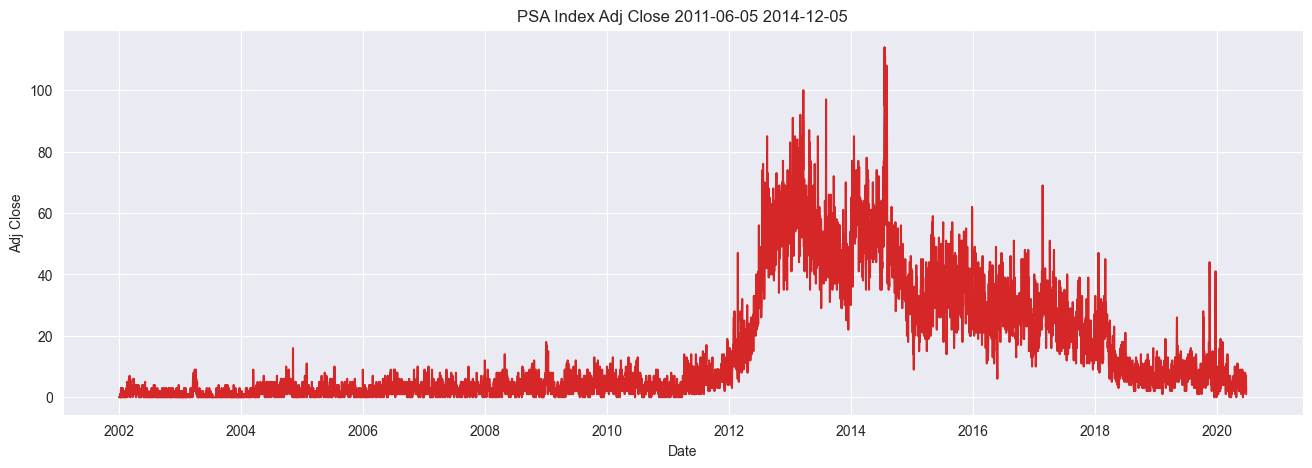

In [8]:

# Draw Plot
def plot_df(data, x, y, title="", xlabel='Date', ylabel='Adj Close', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(data, x=data.index, y=data.conflicts_counts, title='PSA Index Adj Close 2011-06-05 2014-12-05') 

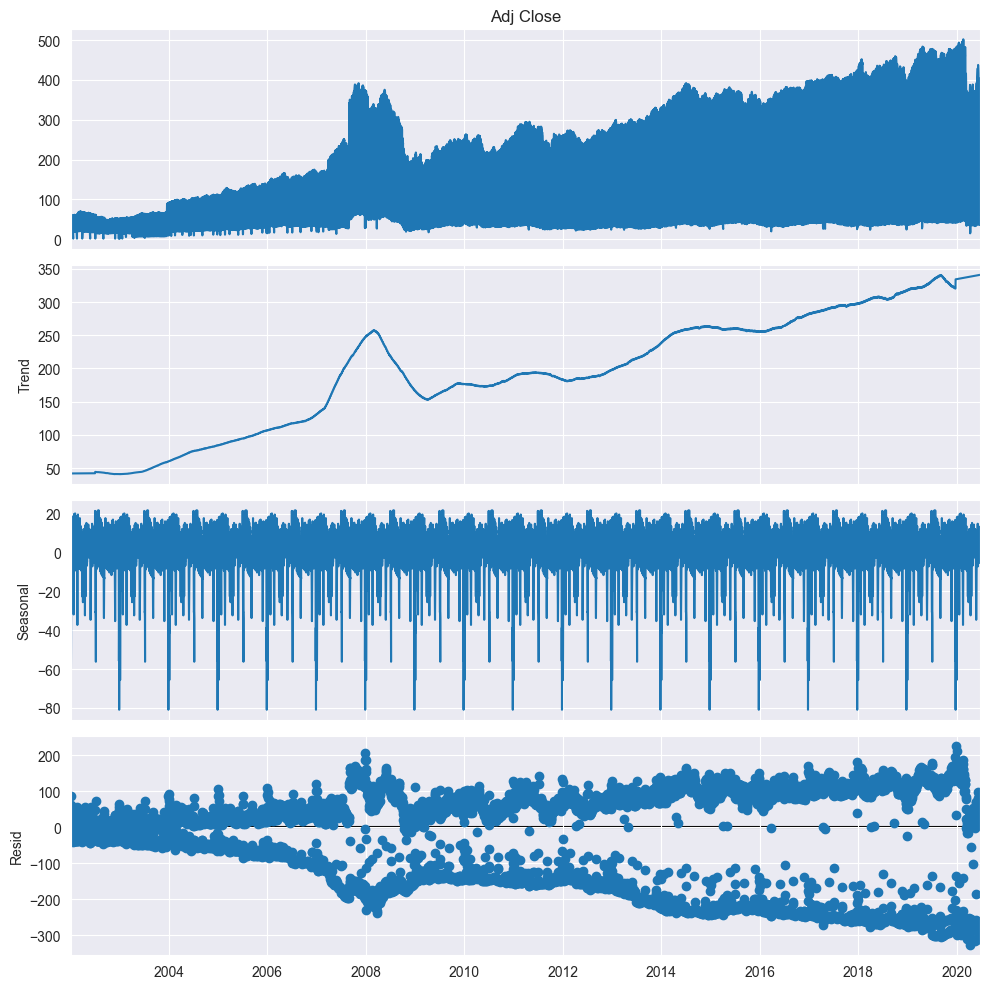

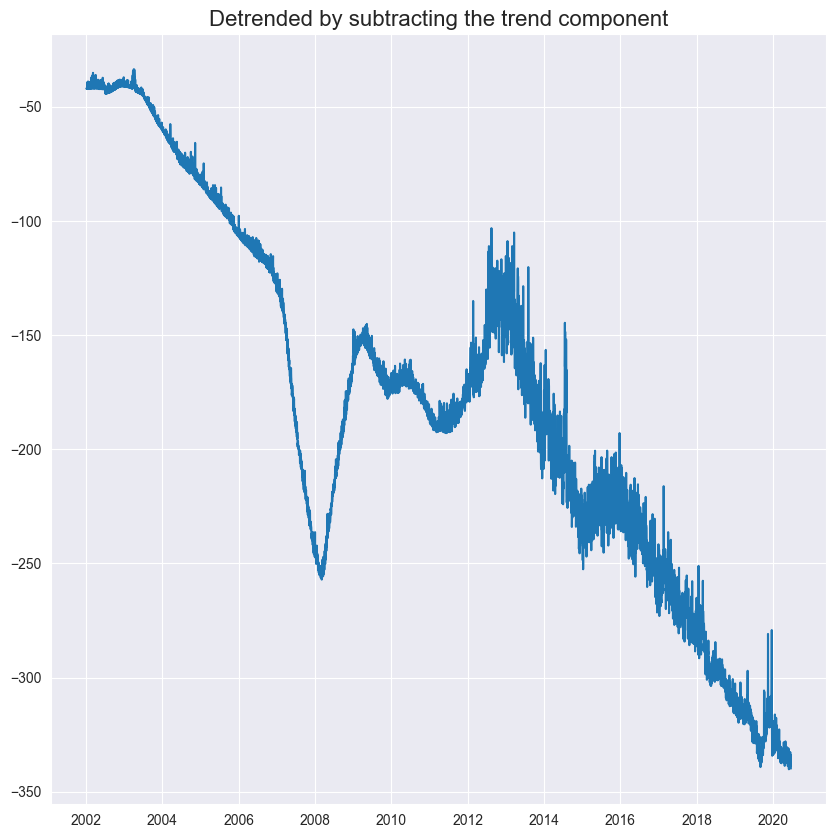

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Especificar el periodo (por ejemplo, si tienes datos diarios y quieres descomponer anualmente, usa 365)
period = 365

# Descomposición aditiva
result_add = seasonal_decompose(data['Adj Close'], model='additive', period=period, extrapolate_trend='freq')

# Plot de la descomposición aditiva
plt.rcParams.update({'figure.figsize': (10, 10)})
result_add.plot()
plt.show()

# Detrend
detrended = data['conflicts_counts'] - result_add.trend
plt.plot(detrended)
plt.title('Detrended by subtracting the trend component', fontsize=16)
plt.show()

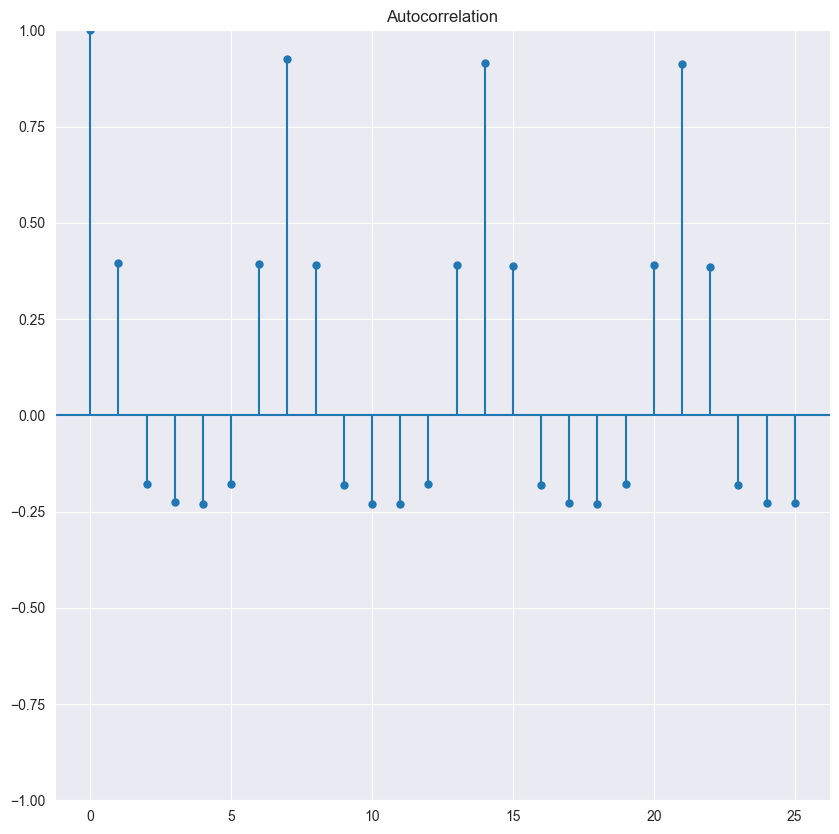

In [10]:
from pmdarima import plot_acf

plot_acf(data['2009-06-05':'2022-12-05']['Adj Close'], lags=25);

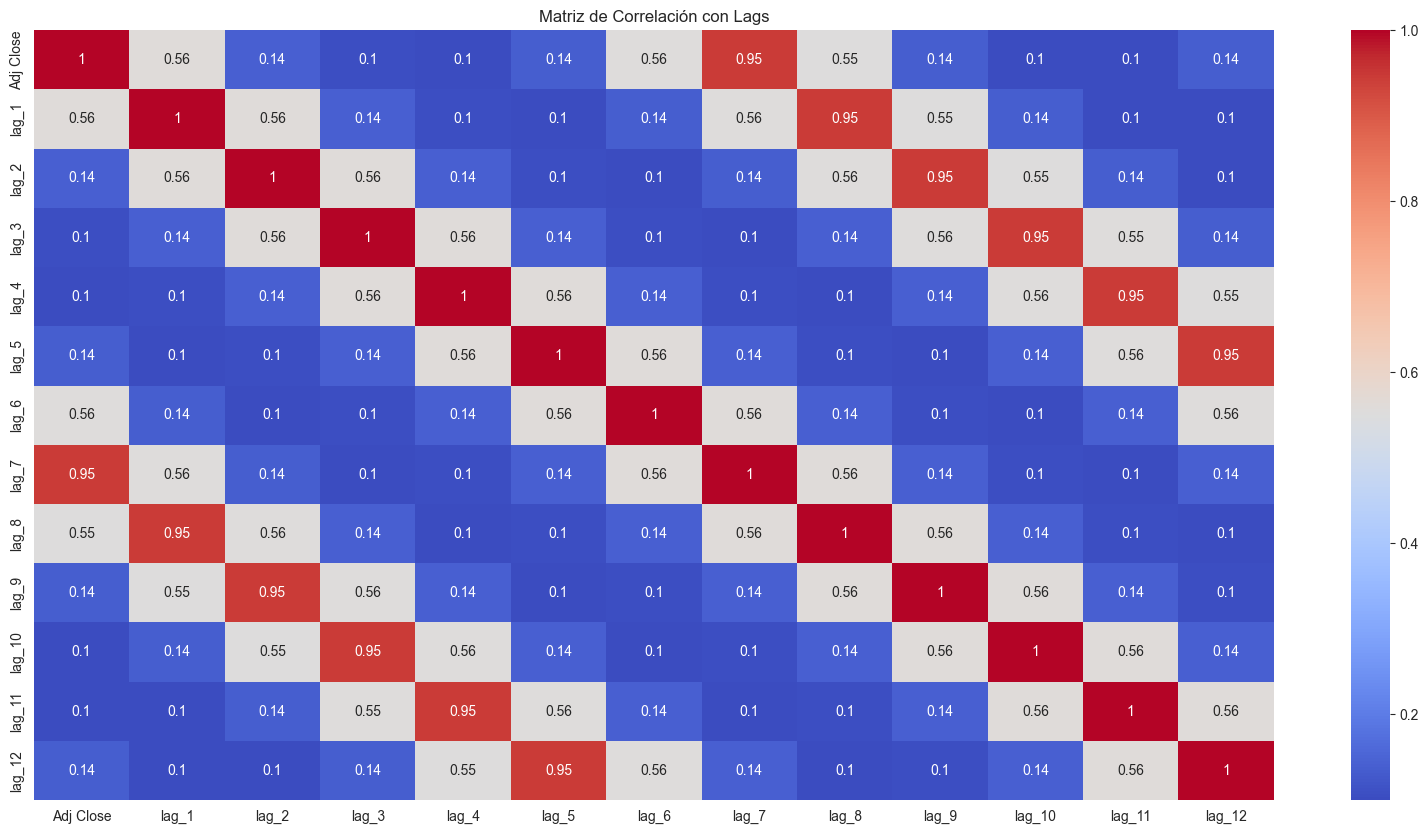

In [11]:
#2
# Creamos columnas para los últimos 5 lags
for lag in range(1, 13):
    data[f'lag_{lag}'] = data['Adj Close'].shift(lag)

# Calculamos la matriz de correlación
correlation_matrix = data[['Adj Close'] + [f'lag_{lag}' for lag in range(1, 13)]].corr()

# Visualizamos la matriz de correlación
plt.figure(figsize=(20,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación con Lags')
plt.show()

In [12]:
data['Adj Close'].mean()

193.53091036621439

Columnas constantes: ['Disaster Subgroup', 'Disaster Type', 'Country', 'Subregion', 'Region', 'Total Deaths', 'Total Affected', 'CPI', 'change_ipc_eeuu', 'trend_ipc_eeuu', 'deaths_civilians_Jordan', 'deaths_unknown_Turkey', 'deaths_unknown_Jordan', 'country_Jordan']
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6063.770, Time=1.60 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6074.728, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6063.386, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6064.371, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6072.912, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=6063.651, Time=0.64 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=6065.545, Time=2.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=6061.537, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=6061.791, Time=0.35 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=6061.909, Time=0.56 sec
 ARIMA(0,1,1)(0,0,0)[0]       

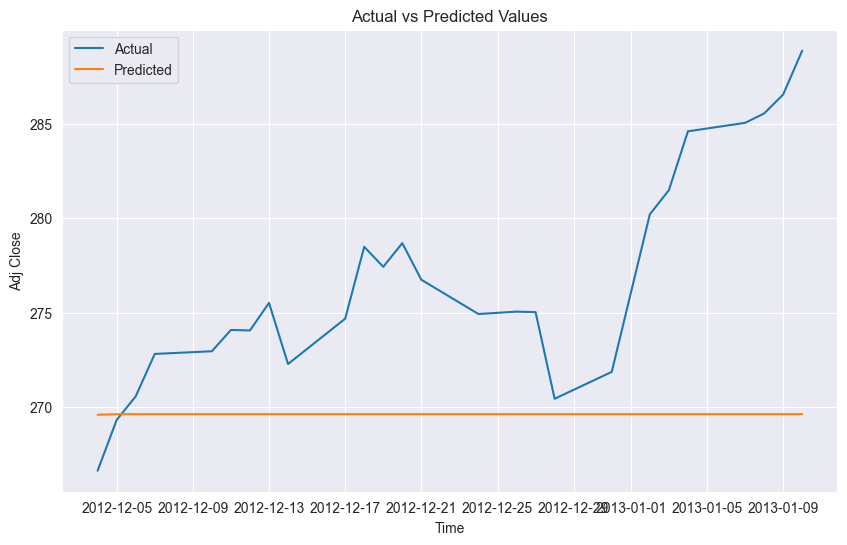

In [1]:
import pandas as pd
from pmdarima import auto_arima
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Cargar los datos
data = pd.read_csv('../docs/data.csv', index_col=0, parse_dates=True)

# Seleccionar las características (features) y el target (conflicts_counts)
features = data.drop(columns=['Adj Close'])
target = data['Adj Close']

# Dividir los datos en entrenamiento y prueba
train_features = features.loc['2009-06-05':'2012-12-05']
train_target = target.loc['2009-06-05':'2012-12-05']

test_features = features.loc['2012-12-04':'2013-01-10']
test_target = target.loc['2012-12-04':'2013-01-10']

# Verificar si hay una columna constante en los datos exógenos
const_cols = [col for col in train_features.columns if train_features[col].nunique() == 1]
print(f"Columnas constantes: {const_cols}")

# Eliminar columnas constantes
train_features = train_features.drop(columns=const_cols)
test_features = test_features.drop(columns=const_cols)

# Estandarizar los datos
scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train_features)
test_features_scaled = scaler.transform(test_features)

# Ajustar el modelo ARIMA con las características exógenas estandarizadas
model_arima = auto_arima(train_target, exogenous=train_features_scaled, 
                         start_p=1, start_q=1, max_p=5, max_q=5, max_d=3, 
                         trace=True, error_action='ignore', suppress_warnings=True, 
                         stepwise=True)

# exogenous=test_features_scaled
# Hacer predicciones

#predictions = model_arima.predict(n_periods=len(test_target), exogenous=test_features_scaled)
predictions = model_arima.predict(n_periods=len(test_target))

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(test_target, predictions)

# Calcular la raíz del error cuadrático medio (RMSE)
rmse = np.sqrt(mse)

# Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(test_target, predictions)

# Calcular el porcentaje del error absoluto medio (MAPE)
mape = np.mean(np.abs((test_target - predictions) / test_target)) * 100

# Mostrar las métricas
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
print(f"MEAN: {data['conflicts_counts'].mean()}%")
print(f"Error Percentage per mean (EPM): {data['conflicts_counts'].mean()/mae * 100}%")

# Graficar los valores reales vs predicciones
plt.figure(figsize=(10, 6))
plt.plot(test_target, label='Actual')
plt.plot(test_target.index, predictions, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Adj Close')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


Columnas constantes: ['Disaster Subgroup', 'Disaster Type', 'Country', 'Subregion', 'Region', 'Total Deaths', 'Total Affected', 'CPI', 'change_ipc_eeuu', 'trend_ipc_eeuu', 'deaths_civilians_Jordan', 'deaths_unknown_Turkey', 'deaths_unknown_Jordan', 'country_Jordan']
Correlaciones:
 Open                         0.992759
High                         0.996152
Low                          0.997166
Adj Close                    0.889958
Volume                      -0.284998
RSI                          0.237205
SMA_10                       0.954781
SMA_20                       0.909557
SMA_50                       0.762809
SMA_100                      0.489706
SMA_200                      0.015400
EMA_10                       0.969232
EMA_20                       0.933852
EMA_50                       0.824022
EMA_100                      0.648959
EMA_200                      0.454264
EMA_12                       0.962085
EMA_26                       0.912564
MACD                         0.47

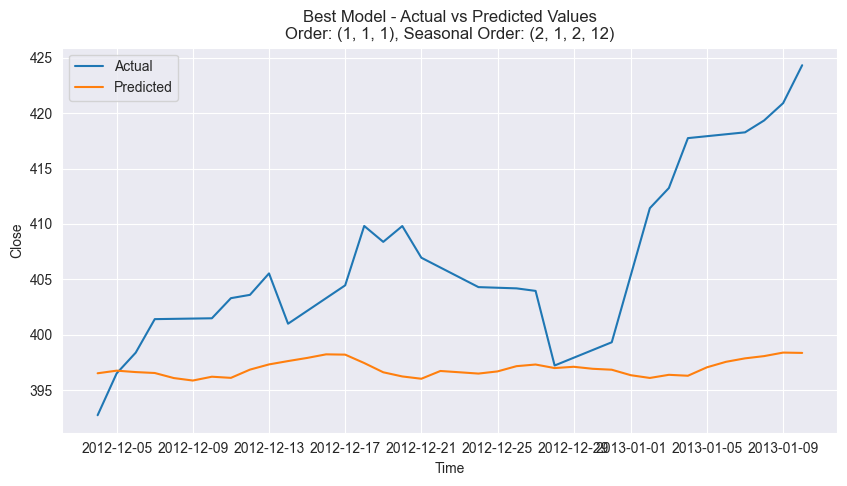

{'MSE': 140.25224047148706,
 'RMSE': 11.842813874729563,
 'MAE': 9.549223095982125,
 'MAPE': 2.4436657014554877,
 'EPM': 4041.4643056485274}

In [1]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import warnings
import pickle

warnings.filterwarnings("ignore")

# Cargar los datos
data = pd.read_csv('../docs/data.csv', index_col=0, parse_dates=True)

# Seleccionar las características (features) y el target (conflicts_counts)
features = data.drop(columns=['Close'])
target = data['Close']

# Dividir los datos en entrenamiento y prueba
train_features = features.loc['2009-06-05':'2012-12-05']
train_target = target.loc['2009-06-05':'2012-12-05']

test_features = features.loc['2012-12-04':'2013-01-10']
test_target = target.loc['2012-12-04':'2013-01-10']

# Verificar si hay una columna constante en los datos exógenos
const_cols = [col for col in train_features.columns if train_features[col].nunique() == 1]
print(f"Columnas constantes: {const_cols}")

# Eliminar columnas constantes
train_features = train_features.drop(columns=const_cols)
test_features = test_features.drop(columns=const_cols)

# Análisis de correlación
correlation = train_features.corrwith(train_target)
print("Correlaciones:\n", correlation)

# Eliminar las características con correlación menor a 0.2
important_features = correlation[abs(correlation) >= 0.2].index
print(f"Características importantes seleccionadas: {important_features.tolist()}")

train_features_selected = train_features[important_features]
test_features_selected = test_features[important_features]

# Estandarizar los datos seleccionados
scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train_features_selected)
test_features_scaled = scaler.transform(test_features_selected)

# Lista de modelos SARIMAX para probar
models = [
    {'order': (1, 1, 1), 'seasonal_order': (1, 1, 1, 12)},
    {'order': (2, 1, 2), 'seasonal_order': (1, 1, 1, 12)},
    {'order': (3, 1, 3), 'seasonal_order': (1, 1, 1, 12)},
    {'order': (4, 1, 4), 'seasonal_order': (1, 1, 1, 12)},
    {'order': (1, 0, 1), 'seasonal_order': (1, 1, 1, 12)},
    {'order': (0, 1, 0), 'seasonal_order': (1, 1, 1, 12)},
    {'order': (2, 0, 0), 'seasonal_order': (1, 1, 1, 12)},
    {'order': (0, 1, 1), 'seasonal_order': (1, 1, 1, 12)},
    {'order': (1, 1, 1), 'seasonal_order': (1, 1, 2, 12)},
    {'order': (1, 1, 1), 'seasonal_order': (1, 1, 3, 12)},
    {'order': (1, 1, 1), 'seasonal_order': (2, 1, 1, 12)},
    {'order': (1, 1, 1), 'seasonal_order': (2, 1, 2, 12)},
]

# Mantén un seguimiento del mejor modelo y su error
best_model = None
best_rmse = float('inf')
best_order = None
best_seasonal_order = None

for i, model_params in enumerate(models):
    model = SARIMAX(train_target, order=model_params['order'], 
                    seasonal_order=model_params['seasonal_order'])
    results = model.fit(disp=False)
        
    predictions = results.predict(start=len(train_target), end=len(train_target) + len(test_target) - 1, 
                                 exog=test_features_scaled)
    mse = mean_squared_error(test_target, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(test_target, predictions)
    mape = np.mean(np.abs((test_target - predictions) / test_target)) * 100
    
    print(f"Model {i+1} - Order: {model_params['order']}, Seasonal Order: {model_params['seasonal_order']}")
    print(f"  MSE: {mse}")
    print(f"  RMSE: {rmse}")
    print(f"  MAE: {mae}")
    print(f"  MAPE: {mape}%\n")
    print(f"Error Percentage per mean (EPM): {data['conflicts_counts'].mean()/mae * 100}%")
    if rmse < best_rmse:
        best_model = results
        best_rmse = rmse
        best_order = model_params['order']  # Almacena el mejor orden
        best_seasonal_order = model_params['seasonal_order']  # Almacena el mejor orden estacional
    
# Graficar el mejor modelo y sus predicciones
best_predictions = best_model.predict(start=len(train_target), end=len(train_target) + len(test_target) - 1, 
                                      exog=test_features_scaled)

plt.figure(figsize=(10, 5))
plt.plot(test_target, label='Actual')
plt.plot(test_target.index, best_predictions, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Close')
plt.title(f'Best Model - Actual vs Predicted Values\nOrder: {best_order}, Seasonal Order: {best_seasonal_order}')
plt.legend()
plt.grid(True)
plt.show()

# Calcular métricas para el mejor modelo
best_mse = mean_squared_error(test_target, best_predictions)
best_rmse = np.sqrt(best_mse)
best_mae = mean_absolute_error(test_target, best_predictions)
best_mape = np.mean(np.abs((test_target - best_predictions) / test_target)) * 100
best_epm = data['Close'].mean() / best_mae * 100

# Mostrar las métricas del mejor modelo
best_metrics = {
    "MSE": best_mse,
    "RMSE": best_rmse,
    "MAE": best_mae,
    "MAPE": best_mape,
    "EPM": best_epm
}

# Guardar el mejor modelo
with open('../model/best_sarimax_model_close.pkl', 'wb') as file:
    pickle.dump(best_model, file)

best_metrics


Columnas constantes: ['Disaster Subgroup', 'Disaster Type', 'Country', 'Subregion', 'Region', 'Total Deaths', 'Total Affected', 'CPI', 'change_ipc_eeuu', 'trend_ipc_eeuu', 'deaths_civilians_Jordan', 'deaths_unknown_Turkey', 'deaths_unknown_Jordan', 'country_Jordan']
Correlaciones:
 Open                         0.992759
High                         0.996152
Low                          0.997166
Adj Close                    0.889958
Volume                      -0.284998
RSI                          0.237205
SMA_10                       0.954781
SMA_20                       0.909557
SMA_50                       0.762809
SMA_100                      0.489706
SMA_200                      0.015400
EMA_10                       0.969232
EMA_20                       0.933852
EMA_50                       0.824022
EMA_100                      0.648959
EMA_200                      0.454264
EMA_12                       0.962085
EMA_26                       0.912564
MACD                         0.47

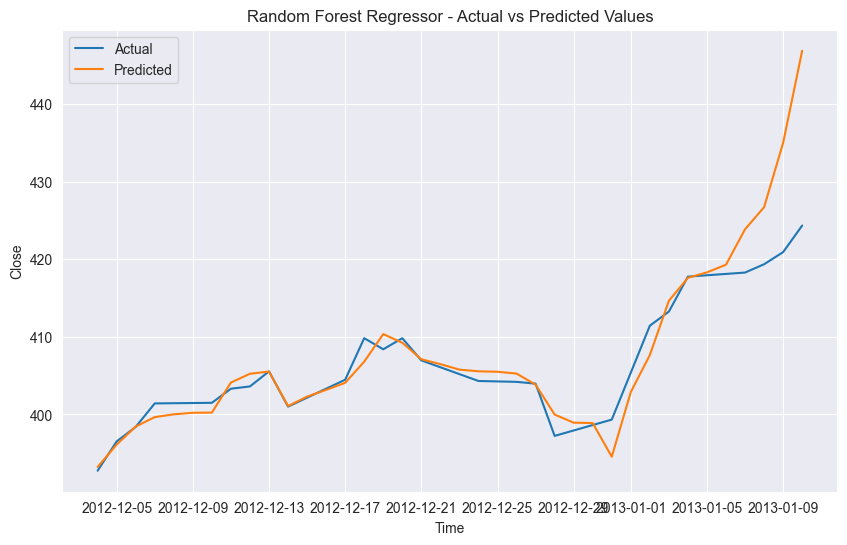

AttributeError: 'RandomForestRegressor' object has no attribute 'save'

In [3]:
import joblib
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

# Cargar los datos
data = pd.read_csv('../docs/data.csv', index_col=0, parse_dates=True)

# Seleccionar las características (features) y el target (conflicts_counts)
features = data.drop(columns=['Close'])
target = data['Close']

train_features = features.loc['2009-06-05':'2012-12-05']
train_target = target.loc['2009-06-05':'2012-12-05']

test_features = features.loc['2012-12-04':'2013-01-10']
test_target = target.loc['2012-12-04':'2013-01-10']

# Verificar si hay una columna constante en los datos exógenos
const_cols = [col for col in train_features.columns if train_features[col].nunique() == 1]
print(f"Columnas constantes: {const_cols}")

# Eliminar columnas constantes
train_features = train_features.drop(columns=const_cols)
test_features = test_features.drop(columns=const_cols)

# Análisis de correlación
correlation = train_features.corrwith(train_target)
print("Correlaciones:\n", correlation)

# Eliminar las características con correlación menor a 0.2
important_features = correlation[abs(correlation) >= 0.8].index
print(f"Características importantes seleccionadas: {important_features.tolist()}")

train_features_selected = train_features[important_features]
test_features_selected = test_features[important_features]

# Estandarizar los datos seleccionados
scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train_features_selected)
test_features_scaled = scaler.transform(test_features_selected)

# Entrenar un modelo de Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(train_features_scaled, train_target)

# Hacer predicciones en el conjunto de prueba
predictions = rf_regressor.predict(test_features_scaled)

# Calcular métricas de evaluación
mse = mean_squared_error(test_target, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_target, predictions)
mape = np.mean(np.abs((test_target - predictions) / test_target)) * 100

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")

# Guardar el mejor modelo
joblib.dump(rf_regressor, '../model/best_random_forest_model.pkl')
# Graficar las predicciones
plt.figure(figsize=(10, 6))
plt.plot(test_target.index, test_target, label='Actual')
plt.plot(test_target.index, predictions, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Close')
plt.title('Random Forest Regressor - Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()
rf_regressor.save('Random Forest Regressor  Close.pkl')

Columnas constantes: ['Disaster Subgroup', 'Disaster Type', 'Country', 'Subregion', 'Region', 'Total Deaths', 'Total Affected', 'CPI', 'change_ipc_eeuu', 'trend_ipc_eeuu', 'deaths_civilians_Jordan', 'deaths_unknown_Turkey', 'deaths_unknown_Jordan', 'country_Jordan']
Correlaciones:
 Open                         0.992759
High                         0.996152
Low                          0.997166
Adj Close                    0.889958
Volume                      -0.284998
RSI                          0.237205
SMA_10                       0.954781
SMA_20                       0.909557
SMA_50                       0.762809
SMA_100                      0.489706
SMA_200                      0.015400
EMA_10                       0.969232
EMA_20                       0.933852
EMA_50                       0.824022
EMA_100                      0.648959
EMA_200                      0.454264
EMA_12                       0.962085
EMA_26                       0.912564
MACD                         0.47

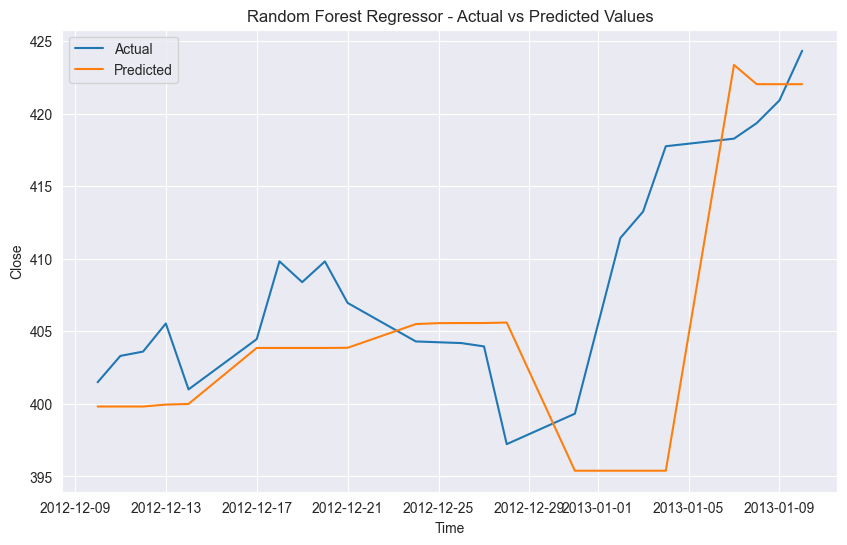

In [4]:
import joblib
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

# Cargar los datos
data = pd.read_csv('../docs/data.csv', index_col=0, parse_dates=True)

# Seleccionar las características (features) y el target (conflicts_counts)
features = data.drop(columns=['Close'])
target = data['Close']

train_features = features.loc['2009-06-05':'2012-12-05']
train_target = target.loc['2009-06-05':'2012-12-05']

test_features = features.loc['2012-12-04':'2013-01-10']
test_target = target.loc['2012-12-04':'2013-01-10']

# Verificar si hay una columna constante en los datos exógenos
const_cols = [col for col in train_features.columns if train_features[col].nunique() == 1]
print(f"Columnas constantes: {const_cols}")

# Eliminar columnas constantes
train_features = train_features.drop(columns=const_cols)
test_features = test_features.drop(columns=const_cols)

# Análisis de correlación
correlation = train_features.corrwith(train_target)
print("Correlaciones:\n", correlation)

# Eliminar las características con correlación menor a 0.2
important_features = correlation[abs(correlation) >= 0.01].index
print(f"Características importantes seleccionadas: {important_features.tolist()}")

train_features_selected = train_features[important_features]
test_features_selected = test_features[important_features]

# Estandarizar los datos seleccionados
scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train_features_selected)
test_features_scaled = scaler.transform(test_features_selected)

# Entrenar un modelo de Random Forest Regressor para cada característica importante
models = {}
for feature in important_features:
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(train_features_scaled, train_features_selected[feature])
    models[feature] = model

# Entrenar el modelo para el target
conflicts_model = RandomForestRegressor(n_estimators=100, random_state=42)
conflicts_model.fit(train_features_scaled, train_target)

# Inicializar las predicciones
predictions = []

# Encontrar los lunes en el conjunto de prueba
mondays = test_features_selected[test_features_selected.index.weekday == 0]

# Realizar predicciones iterativas para 5 días a partir de cada lunes
for start_date in mondays.index:
    end_date = start_date + pd.Timedelta(days=4)
    # Asegurar que el periodo sea de lunes a viernes
    if end_date.weekday() != 4:
        continue
        
    current_features = test_features_selected.loc[start_date]
    current_features_scaled = scaler.transform([current_features])
    
    for date in pd.date_range(start=start_date, end=end_date, freq='D'):
        if date not in test_features_selected.index:
            break
            
        next_day_features = {}
        for feature in important_features:
            next_day_prediction = models[feature].predict(current_features_scaled)
            next_day_features[feature] = next_day_prediction[0]
        
        # Predecir 'conflicts_counts'
        next_day_conflicts_prediction = conflicts_model.predict(current_features_scaled)
        predictions.append((date, next_day_conflicts_prediction[0]))
        
        # Actualizar current_features_scaled para la siguiente predicción
        current_features = pd.Series(next_day_features)
        current_features_scaled = scaler.transform([current_features])

# Crear un DataFrame para las predicciones
predictions_df = pd.DataFrame(predictions, columns=['Date', 'Predictions'])
predictions_df.set_index('Date', inplace=True)

# Asegurarse de que test_target y predictions_df tengan la misma longitud
test_target = test_target[test_target.index.isin(predictions_df.index)]
predictions_df = predictions_df[predictions_df.index.isin(test_target.index)]

# Calcular métricas de evaluación en el conjunto de prueba
mse = mean_squared_error(test_target, predictions_df['Predictions'])
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_target, predictions_df['Predictions'])
mape = np.mean(np.abs((test_target - predictions_df['Predictions']) / test_target)) * 100
epm = mae / test_target.mean() * 100

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
print(f"Error Percentage per Mean (EPM): {epm}%")

# Guardar los mejores modelos
joblib.dump(models, '../model/best_random_forest_models.pkl')
joblib.dump(conflicts_model, '../model/best_random_forest_conflicts_model.pkl')

# Graficar las predicciones en el intervalo de prueba
plt.figure(figsize=(10, 6))
plt.plot(test_target.index, test_target, label='Actual')
plt.plot(predictions_df.index, predictions_df['Predictions'], label='Predicted')
plt.xlabel('Time')
plt.ylabel('Close')
plt.title('Random Forest Regressor - Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


In [62]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,RSI,SMA_10,SMA_20,SMA_50,...,deaths_unknown_Syria,deaths_unknown_Jordan,country_Pakistan,country_Iran,country_Turkey,country_Israel,country_Iraq,country_Syria,country_Jordan,conflicts_counts
2002-01-02,109.785643,110.186893,107.121810,108.826291,60.729124,3.646195e+07,316.156339,107.906098,106.725313,104.614909,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2002-01-03,109.041778,110.330741,108.228961,109.476767,61.123635,3.377696e+07,307.801220,108.398298,106.901267,104.760061,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2002-01-04,109.585518,111.625430,108.979265,110.664550,61.830605,2.895490e+07,317.807298,108.777951,106.990244,104.938742,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2002-01-05,109.788529,111.608293,108.962524,110.584663,61.799914,4.355186e+07,320.516639,108.934105,107.057661,105.002419,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2002-01-06,109.991540,111.591155,108.945782,110.504776,61.769223,5.814882e+07,323.225979,109.090259,107.125077,105.066096,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


10:18:54 - cmdstanpy - INFO - Chain [1] start processing
10:18:54 - cmdstanpy - INFO - Chain [1] done processing


Mean Squared Error (MSE): 24.024184102191175
Root Mean Squared Error (RMSE): 4.901447143670038
Mean Absolute Error (MAE): 4.067280241342027
Mean Absolute Percentage Error (MAPE): nan%
Error Percentage per Mean (EPM): 1.0058069153623121%


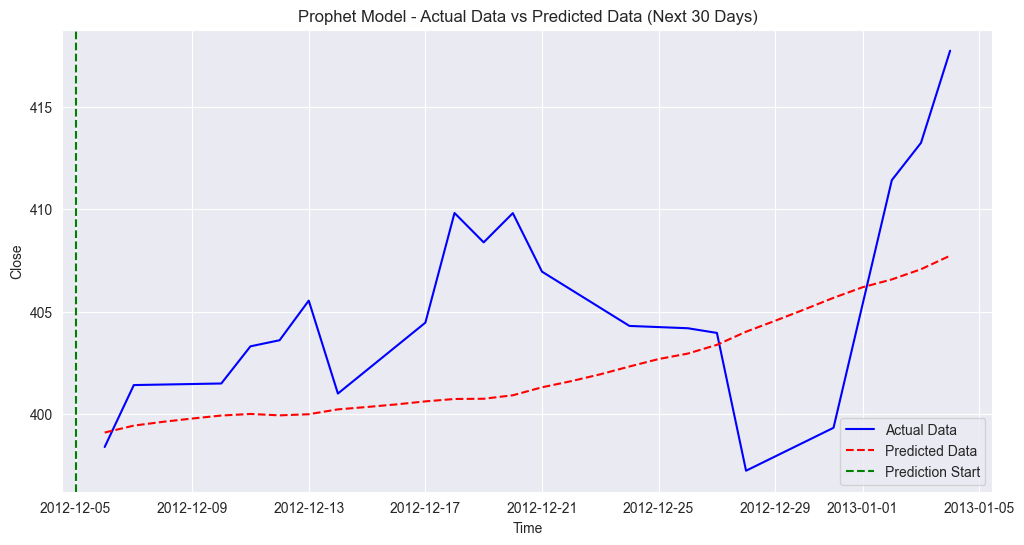

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Cargar los datos
data = pd.read_csv('../docs/data.csv', index_col=0, parse_dates=True)

# Seleccionar el target (conflicts_counts)
target = data['Close'].reset_index()
target.rename(columns={'index': 'ds', 'Close': 'y'}, inplace=True)

# Dividir los datos en entrenamiento
train_data = target.loc[(target['ds'] >= '2009-06-05') & (target['ds'] <= '2012-12-05')]

# Definir y entrenar el modelo Prophet
model = Prophet()
model.fit(train_data)

# Crear un dataframe para predicciones futuras (30 días)
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# Obtener las fechas y los valores predichos para los próximos 30 días
future_dates = forecast['ds'].iloc[-30:]
future_predictions = forecast['yhat'].iloc[-30:]

# Obtener los datos reales para los próximos 30 días
real_future_data = target.loc[target['ds'].isin(future_dates)]

# Calcular métricas de error
mse = mean_squared_error(real_future_data['y'], future_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(real_future_data['y'], future_predictions)
mape = np.mean(np.abs((real_future_data['y'] - future_predictions) / real_future_data['y'])) * 100
epm = (mae / real_future_data['y'].mean()) * 100

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
print(f"Error Percentage per Mean (EPM): {epm}%")

# Graficar los resultados
plt.figure(figsize=(12, 6))

# Graficar los datos reales solo en el intervalo de las predicciones
plt.plot(real_future_data['ds'], real_future_data['y'], label='Actual Data', color='blue')

# Graficar las predicciones futuras
plt.plot(future_dates, future_predictions, label='Predicted Data', linestyle='--', color='red')

# Configurar la gráfica
plt.axvline(x=train_data['ds'].iloc[-1], color='green', linestyle='--', label='Prediction Start')
plt.xlabel('Time')
plt.ylabel('Close')
plt.title('Prophet Model - Actual Data vs Predicted Data (Next 30 Days)')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()
